# TD-TME04: algorithme des K-moyennes

L'objectif de ce TP est d'implémenter un nouvel algorithme d'apprentissage non-supervisé, l'algorithme des K-moyennes (cours 4).

## Exercices (à faire sans machine)

(partie à faire chez soi ou en fin de séance)

### Exercices sur les distances

#### Question 1
Montrer que la distance de Manhattan est bien une mesure de distance. 
C'est-à-dire que c'est une mesure 
- symétrique : d(x,y) = d(y,x) pour tout x, y
- telle que d(x,x) = 0 pour tout x
- qui vérifie l'inégalité triangulaire: d(x,z) $\leq$ d(x,y) + d(y,z) pour tout x, y, et z


## Préparation

Télécharger l'archive ici: http://webia.lip6.fr/~marsala/3i026/
Décompresser cette archive, elle crée le répertoire "TP04" qui contient un fichier ipython à ouvrir (ce fichier-ci) et un sous-répertoire "data" contenant les bases d'apprentissage qui seront utilisées dans ce TP.

Le but de ce TP est de compléter ce document ipython en rajoutant les fonctions demandées.

Commencer par travailler sur les données "base-2D" afin de tester les fonctions à écrire. Une fois tout implémenté, la base de données réelles peut alors être utilisée.

Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles:


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  
import math
import random

### Chargement du fichier "base_2D.csv"

La lecture d'un fichier CSV par pd.read() fournit un DataFrame que vous avez appris à manipuler dans le TP02.

In [3]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D  # ou bien: data_2D[0:len(data_2D)]

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0
5,4.0,4.0
6,4.0,5.0
7,4.0,6.0
8,4.5,1.0
9,4.5,6.0


Dans la suite de ce TP, il est conseillé de travailler sur des données de type DataFrame le plus souvent possible.

**Important**: dans la suite de ce TP, on appelle:

- "base d'apprentissage" le DataFrame contenant l'ensemble des exemples d'apprentissage chargés par la commande précédente
- "base d'exemples" : un DataFrame contenant un ensemble d'exemples (remarque: la base d'apprentissage et le plus grand ensemble d'exemples possible)

### Récupération des fonctions utiles

Reprendre (ou réécrire) la fonction normalisation() du TD-TME03.

In [4]:
def normalisation(dff) :
    df = dff.copy()
    for i in df.columns :
        mi = min(df[i])
        ma = max(df[i])
        df[i] =  (df[i]- mi) / (ma - mi)
    
    return df

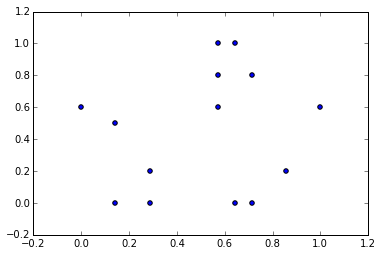

In [68]:
DF_data2D = normalisation(data_2D)
M_data2D = DF_data2D.as_matrix()

colonne_X= M_data2D[0:,0]
colonne_Y= M_data2D[0:,1]
plt.scatter(colonne_X,colonne_Y)
plt.show()

Reprendre (ou réécrire) la fonction dist_vec() du TD-TME03. 
En particulier, vous allez avoir besoin de la fonction dist_vec(nom,v1,v2) qui, étant donné une chaîne de caractères ("euclidienne" ou "manhattan") et 2 vecteurs (représentés sous la forme de DataFrame) rend la distance entre ces 2 vecteurs.

In [6]:
def dist_euclidienne_vect(d1,d2) :
    return math.sqrt(pow((d1.values-d2.values),2).sum())

In [7]:
def dist_manhattan_vect(d1,d2) :
    return (abs(d1.values-d2.values)).sum()

In [8]:
def dist_vect(fonc,l1,l2):
    if(fonc == "euclidienne") :
        return dist_euclidienne_vect(l1,l2)
    else :
        return dist_manhattan_vect(l1,l2)

In [69]:
dist_euclidienne_vect(DF_data2D[0:1], DF_data2D[7:8])

0.6975174637562116

In [70]:
dist_manhattan_vect(DF_data2D[13:14], DF_data2D[1:2])

0.95714285714285718

### Calcul de centroides

Ecrire la fonction centroide() qui, étant donné un DataFrame représentant plusieurs exemples rend le centroide (calculé en faisant la moyenne de chaque composante des vecteurs de la matrice). Cette fonction doit rendre un DataFrame.

In [17]:
def centroide(df) : 
    return pd.DataFrame(df.mean()).T

In [71]:
centroide(DF_data2D[0:6])

,X,Y
0,0.238095,0.316667


## Travail à réaliser

### Inertie d'un cluster
Ecrire la fonction inertie_cluster qui, étant donné une chaîne de caractères donnant le nom de la distance à utiliser, et un DataFrame contenant un ensemble d'exemples, rend la valeur de l'inertie de cet ensemble.

In [34]:
def inertie_cluster(fonc , df) :
    s=0
    for i,ligne in df.iterrows() :
        s=s+ (pow(dist_vect(fonc,pd.DataFrame(ligne).T,centroide(df)),2))
    return s

In [72]:
inertie_cluster("euclidienne",data_2D)

101.30357142857144

In [73]:
inertie_cluster("manhattan",data_2D)

166.94642857142856

Dans ce qui suit, on appelle "ensemble de centroides" un DataFrame contenant $K$ vecteurs de dimensions $p$.

Ecrire la fonction choix_depart() qui étant donné un entier $K>1$ et une base d'apprentissage (sous la forme d'un DataFrame) de $n$ exemples rend ensemble de centroides contenant $K$ exemples tirés aléatoirement dans la base.
On fait l'hypothèse que $K\leq n$.

*Remarque*: étudier les fonctions de la librairie random de Python...


In [62]:
def choix_depart(k,df) :
    v=range(0,len(df))
    random.shuffle(v)
    return pd.DataFrame(df.iloc [v[0:k]])     

In [86]:
Centroides_test = choix_depart(3,DF_data2D)
Centroides_test

,X,Y
7,0.571429,1.0
10,0.714286,0.0
4,0.285714,0.2


En utilisant l'option "color='blue'" ou "color='red'" de la fonction scatter(), réaliser l'affichage de la base d'apprentissage (en bleu) et de l'ensemble des centroides (en rouge)

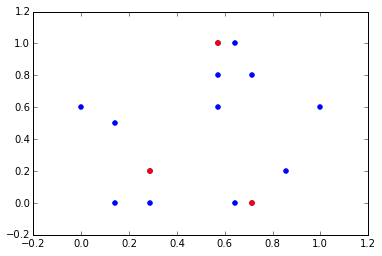

In [87]:

M_data2D = DF_data2D.as_matrix()

colonne_X= M_data2D[0:,0]
colonne_Y= M_data2D[0:,1]
plt.scatter(colonne_X,colonne_Y,color='blue')

M_data2D = Centroides_test.as_matrix()
colonne_X= M_data2D[0:,0]
colonne_Y= M_data2D[0:,1]
plt.scatter(colonne_X,colonne_Y,color='red')


Ecrire la fonction plus_proche() qui, étant donné une chaîne donnant un nom de distance à utiliser, un exemple et un ensemble de centroides, rend l'indice (dans l'ensemble) du centroide dont l'exemple est le plus proche.
En cas d'égalité de distance, le centroide de plus petit indice est choisi.

In [82]:
def plus_proche(fonc,ex,cent):
    mini=20
    indiceMin=0
    for i,ligne in cent.iterrows():
        if (mini > dist_vect(fonc,ex,pd.DataFrame(ligne).T)):
            mini=dist_vect(fonc,ex,pd.DataFrame(ligne).T)
            indiceMin=i
    return indiceMin

In [85]:
DF_data2D

,X,Y
0,0.000000,0.6
1,0.142857,0.5
2,0.142857,0.0
3,0.285714,0.0
4,0.285714,0.2
5,0.571429,0.6
6,0.571429,0.8
7,0.571429,1.0
8,0.642857,0.0
9,0.642857,1.0


In [92]:
plus_proche('euclidienne',DF_data2D[5:],Centroides_test)

7

In [89]:
plus_proche('manhattan',DF_data2D.loc[DF_data2D.index[5]],Centroides_test)

7

### Matrice d'affectation

Etant donné une base d'apprentissage, on peut représenter un partitionnement de cette base en K clusters à l'aide d'une matrice U contenant n lignes (une ligne par exemple) et K colonnes (une colonne par cluster) telle que 
- U[i,j] = 1 si l'exemple i appartient au cluster j
- U[i,j] = 0 si l'exemple i n'appartient pas au cluster j
- un exemple appartient à un et un seul cluster
- un cluster contient au moins un exemple

On appelle **matrice d'affectation** cette matrice U.


#### Question 2
Donner une expression mathématique des 2 dernières contraintes que vérifie une matrice d'affectation.

#### Implémentation en Python
Dans ce TP, nous utilisons un dictionnaire pour représenter d'une matrice d'affectation: 
- les clés de ce dictionnaire correspondent aux K indices des clusters
- les valeurs correspondent à des listes d'indices d'exemples (leur indice dans la base d'apprentissage)

Dans tout ce qui suit, une "matrice d'affectation" sera un tel dictionnaire.


Ecrire la fonction affecte_cluster() qui, étant donné un nom de distance, une base d'apprentissage et un ensemble de centroïdes, rend la matrice d'affectation des exemples de la base aux clusters représentés par chaque centroïde.

In [93]:
def affecte_cluster(fonc, base, cent):
    d=dict()
    for i , c in cent.iterrows():
        d[i]=[]
    for j,ex in base.iterrows():
            centroideProche=(plus_proche(fonc,pd.DataFrame(ex).T,cent))
            d[centroideProche].append(j)
    return d

In [100]:
DictAffect = affecte_cluster("euclidienne",DF_data2D, Centroides_test)
DictAffect

{4: [0, 1, 2, 3, 4], 7: [5, 6, 7, 9, 11, 13], 10: [8, 10, 12]}

### Ensemble des centroides
Grâce à la matrice d'affectation, on peut maintenant trouver les nouveaux centroides. Ceux-ci sont déterminés en prenant les ensembles des exemples qui sont affectés au même cluster.

Ecrire la fonction nouveaux_centroides() qui, étant donné un chaîne de caractères donnant le nom d'une distance, une base d'apprentissage et une matrice d'affectation, rend l'ensemble des centroides correspondant.

In [101]:
def nouveaux_centroides(fonc,base,dic):
    centre=pd.DataFrame()
    for i in range(len(dic)):
        centre=centre.append(base.loc[dic[i]],ignore_index=True)
    return centre

In [102]:
nouveaux_centroides("euclidienne", DF_data2D, DictAffect)

KeyError: 0

### Inertie globale d'une partition

En utilisant la fonction inertie_cluster(), écrire la fonction inertie_globale() qui, étant donné un nom de distance, une base d'apprentissage et une matrice d'affectation, rend la valeur de l'inertie globale du partitionnement correspondant.


In [98]:
def inertie_globale(fonc,base,mat):
    som=0
    for i in mat.keys():
        som=som+inertie_cluster(fonc,pd.DataFrame(mat[i]))
    return som

In [99]:
inertie_globale("euclidienne",DF_data2D,DictAffect)

65.5

### Algorithme des K-moyennes

En utilisant les fonctions précédentes, implémenter l'algorithme des K-moyennes.
Vous écrirez une fonction kmoyennes() qui prend en argument un entier $K>1$, une base d'apprentissage, un nom de distance, ainsi que deux nombres: un réel *epsilon*$>0$ et un entier *iter_max*$>1$, et qui rend un ensemble de centroides et une matrice d'affectation.

Le réel *epsilon* servira de critère de convergence, et l'entier *iter_max* sera utilisé pour fixer un nombre d'itérations maximale servant à arrêter le calcul.

In [103]:
les_centres, l_affectation = kmoyennes(2, DF_data2D, "euclidienne", 0.15, 100)

print(les_centres)
print(l_affectation)

NameError: name 'kmoyennes' is not defined

### Expérimentations

Expérimenter l'algorithme des k-moyennes sur les données. Etudier l'impact du choix de $K$ sur l'inertie globale finale. Faire de même en relançant plusieurs fois l'algorithme avec la même valeur de $K$, en modifiant la valeur de epsilon ou de max_iter, etc.

### Améliorations

Ecrire une fonction permettant d'afficher en K couleurs les exemples d'apprentissage et les centroides obtenus en résultats de la fonction précédente. Les exemples affectés à un même cluster seront affichés dans une couleur identique.

*Remarque*: La librairie matplotlib permet de pouvoir manipuler aisément des couleurs:
http://matplotlib.org/api/cm_api.html

## Application à des données réelles

- Appliquer l'algorithme aux données concernant les déchets de la ville de Paris (qui sont fournies dans le répertoire data)
- Trouver des bases d'apprentissage intéressantes sur http://opendata.paris.fr/


Dans les 2 cas, étudier la base et les clusters qui peuvent être mis en évidence. En particulier, regarder la variation de l'inertie globale des clusters obtenus en fonction de la valeur de $K$ choisie.


**Attention**: il faudra certainement préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faudra donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.